# Assignment 2 - Statistical Treatment for NYC Property Sales
Project ini untuk memenuhi tugas dari Course Introduction To Python For Data Science

Identitas : Yusraini Nurul Asra (PYTN-KS19-017)

## Project Overview

Pada assigment 2, tugasnya adalah lakukan metode statistik kepada dataset, seperti Central Tendencies, Interval, Hypotesis Testing dan semua metode statistik yang telah dipelajari

Sumber Data : https://www.kaggle.com/datasets/new-york-city/nyc-property-sales

## Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import math
import statistics
import scipy.stats
from scipy.stats import shapiro,jarque_bera
from scipy import stats
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.diagnostic import lilliefors
from statistics import NormalDist
from scipy.stats import gaussian_kde
import plotly.express as px
import statsmodels.api as sm

## Data Loading

Mendefinisikan data lalu import file csv dengan pd.read_csv. Setelah itu menampilkan data.

In [2]:
df = pd.read_csv('nyc-rolling-sales.csv')
pd.set_option('display.max.columns',None)
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [3]:
df.shape

(84548, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

## Preprocessing Data

Drop kolom yang tidak penting seperti berikut.

In [5]:
df.drop(["Unnamed: 0","BLOCK", "LOT", "ADDRESS",], axis=1, inplace=True)

Mengubah kode di borough menjadi nama areanya.

In [6]:
renaming_borough = {1: 'Manhattan',
                    2: 'Bronx',
                    3: 'Brooklyn',
                    4: 'Queens',
                    5: 'Staten Island'}
df['BOROUGH'] = df['BOROUGH'].replace(renaming_borough)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,EASE-MENT,BUILDING CLASS AT PRESENT,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,,C2,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,,C7,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,,C7,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,,C4,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,,C2,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Convert Columns Data Type
1. **int64:** Tipe data ini digunakan untuk menyimpan bilangan bulat (integer) dalam format 64-bit.
2. **object:** Tipe data ini digunakan untuk menyimpan objek atau tipe data yang tidak termasuk dalam tipe data numerik atau tipe data tanggal dan waktu.
3. **category:** Tipe data ini adalah tipe data khusus yang digunakan untuk menyimpan data kategori atau faktor. 
4. **float64:** Tipe data ini digunakan untuk menyimpan bilangan desimal dalam format 64-bit.
5. **datetime64[ns]:** Tipe data ini digunakan untuk menyimpan data tanggal dan waktu dengan presisi hingga nanodetik (10^-9 detik). Ini adalah tipe data yang berguna untuk data tanggal dan waktu, seperti tanggal transaksi atau waktu pengamatan. 

Mengubah tipe data SALE DATE menjadi datetime.

In [7]:
df["SALE DATE"] = pd.to_datetime(df["SALE DATE"])

Menggunakan coerce pada data numerik untuk mengkonversi value yang invalid.

In [8]:
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" , "GROSS SQUARE FEET","SALE PRICE"]
for col in numeric: 
    df[col] = pd.to_numeric(df[col], errors='coerce')

Mengubah columns sisanya menjadi category.

In [9]:
categorical = []
for i in df.columns[:-1]:
    if i not in numeric:
        categorical.append(i)

for col in categorical: 
    df[col] = df[col].astype("category")

Mengubah yang bernilai kosong/blank menjadi NaN.

In [10]:
df.replace(' ',np.nan, inplace=True)

Mengecek missing values dan persentasenya.

In [11]:
pd.DataFrame({
    "null":df.isnull().sum().values,
    "null_percentage":df.isnull().sum().values / len(df) * 100,
    "unique":[df[i].nunique() for i in df.columns],
    "type":df.dtypes.values
}).set_index(df.isnull().sum().index).sort_values("null",ascending=False)

,null,null_percentage,unique,type
EASE-MENT,84548,100.000000,0,category
APARTMENT NUMBER,65496,77.466055,3988,category
GROSS SQUARE FEET,27612,32.658372,5690,float64
LAND SQUARE FEET,26252,31.049818,6061,float64
SALE PRICE,14561,17.222170,10007,float64
TAX CLASS AT PRESENT,738,0.872877,10,category
BUILDING CLASS AT PRESENT,738,0.872877,166,category
BOROUGH,0,0.000000,5,category
BUILDING CLASS AT TIME OF SALE,0,0.000000,166,category
TAX CLASS AT TIME OF SALE,0,0.000000,4,category


Hanya mengambil yang SALE PRICEnya lebih besar dari 0.

In [12]:
df = df[df["SALE PRICE"] != 0]
df.loc[:, "BUILDING CLASS AT PRESENT"] = df["BUILDING CLASS AT PRESENT"].str[0]

### Replace Missing Value

1. **EASE-MENT (84548 missing values):**
Kolom "EASE-MENT" memiliki jumlah missing value yang sangat besar,  menunjukkan bahwa mungkin tidak memberikan informasi berharga untuk analisis. Oleh karena itu, akan dihapus agar menyederhanakan dataset.

In [13]:
df.drop('EASE-MENT', axis=1, inplace=True)

2. **APARTMENT NUMBER (65496 missing values):**
Kolom "APARTMENT NUMBER" memiliki jumlah missing value yang cukup besar,  menunjukkan bahwa mungkin tidak memberikan informasi berharga untuk analisis. Oleh karena itu, akan dihapus agar menyederhanakan dataset.

In [14]:
df.drop('APARTMENT NUMBER', axis=1, inplace=True)

3. **GROSS SQUARE FEET (27612 missing values):**
Kolom "LAND SQUARE FEET" berisi data numerik sehingga **rata-rata** atau median adalah penanganan yang tepat untuk menangani data numerik dengan missing value. Menggunakan rata-rata dapat membantu mempertahankan distribusi data secara keseluruhan, sementara menggunakan median adalah pendekatan yang lebih kuat dan kurang sensitif terhadap pencilan.

In [15]:
df['GROSS SQUARE FEET'].fillna(df['GROSS SQUARE FEET'].mean(), inplace=True)

4. **LAND SQUARE FEET (26252 missing values):**
Kolom "LAND SQUARE FEET" berisi data numerik sehingga **rata-rata** atau median adalah penanganan yang tepat untuk menangani data numerik dengan missing value.

In [16]:
df['LAND SQUARE FEET'].fillna(df['LAND SQUARE FEET'].mean(), inplace=True)

5. **SALE PRICE (14561 missing values):**
Kolom "SALE PRICE" mewakili harga jual properti. Untuk data numerik seperti ini, missing value dapat ditangani dengan rata-rata, median, atau nol untuk mempertahankan distribusi data. Pemilihan antara rata-rata dan median tergantung pada distribusi data dan sensitivitas terhadap pencilan. Missing values akan diganti dengan **median**, karena akan lebih mendekati nilai-nilai yang sebenarnya. Hal ini akan memengaruhi hasil analisis yang melibatkan statistik deskriptif sehingga mendapatkan gambaran yang lebih akurat tentang pusat sebaran. Jika mengganti missing value dengan nilai nol, rata-rata dan median akan menurun secara signifikan. Data yang dihasilkan akan mencerminkan bahwa sebagian besar harga properti adalah nol, yang *mungkin tidak sesuai dengan kenyataan*.

In [17]:
df['SALE PRICE'].fillna(df['SALE PRICE'].median(), inplace=True)

6. **TAX CLASS AT PRESENT (738 missing values):**
Kolom "TAX CLASS AT PRESENT" berisi data kategorikal sehingga **modus** adalah penanganan yang tepat untuk menangani data kategorikal dengan missing value.

In [18]:
df['TAX CLASS AT PRESENT'].fillna(df['TAX CLASS AT PRESENT'].mode()[0], inplace=True)

7. **BUILDING CLASS AT PRESENT (738 missing values):**
Kolom "BUILDING CLASS AT PRESENT" berisi data kategorikal sehingga **modus** adalah penanganan yang tepat untuk menangani data kategorikal dengan missing value.

In [19]:
df['BUILDING CLASS AT PRESENT'].fillna(df['BUILDING CLASS AT PRESENT'].mode()[0], inplace=True)

Menambahkan kolom YEAR dari kolom SALE DATE dan memodifikasi kolom BUILDING CLASS AT PRESENT dengan mereplace valuenya dengan karakter utamanya.

In [20]:
df["YEAR"] = [i.year for i in df["SALE DATE"]]
df["BUILDING CLASS AT PRESENT"] = df["BUILDING CLASS AT PRESENT"].str[0]

<Axes: xlabel='SALE PRICE'>

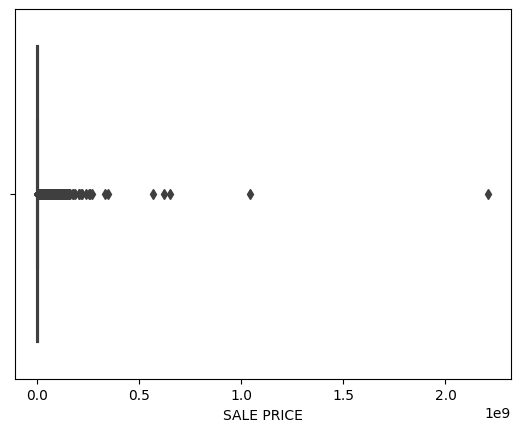

In [21]:
sns.boxplot(data=df,x="SALE PRICE")

Dari hasil di atas, dapat dilihat terdapat cukup banyak outliers. Oleh karena itu akan dilakukan removing outliers dengan metode IQR (Interquartile Range).

In [22]:
# IQR
Q1 = df['SALE PRICE'].describe().loc["25%"]
Q3 = df['SALE PRICE'].describe().loc["75%"]
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df_without_outliers = df[(df["SALE PRICE"] >= lower) & (df["SALE PRICE"] <= upper)]

<Axes: xlabel='SALE PRICE'>

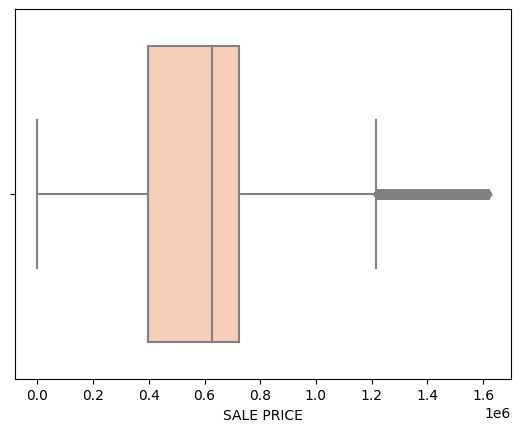

In [23]:
sns.boxplot(data=df_without_outliers, x="SALE PRICE", color='#FFCAAF')

Karena masih terdapat cukup banyak outliers, ulangi langkah di atas sebanyak yang dibutuhkan.

In [24]:
n= 1
limit = 2

while n <= limit:
    Q1 = df_without_outliers["SALE PRICE"].describe().loc["25%"]
    Q3 = df_without_outliers["SALE PRICE"].describe().loc["75%"]
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    df_without_outliers = df_without_outliers[(df_without_outliers["SALE PRICE"] >= lower) & (df_without_outliers["SALE PRICE"] <= upper)]
    
    n += 1

<Axes: xlabel='SALE PRICE'>

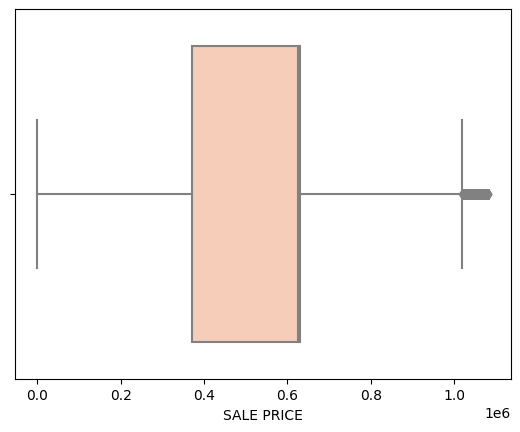

In [25]:
sns.boxplot(data=df_without_outliers, x="SALE PRICE", color='#FFCAAF')

## Measure of Central Tendency

In [26]:
mct = df_without_outliers.groupby(["BOROUGH","BUILDING CLASS AT PRESENT","YEAR"]).agg({"SALE PRICE":[np.mean,
                                                                                    np.median,
                                                                                    statistics.mode,
                                                                                   np.ptp,
                                                                                   np.var,
                                                                                   np.std]})
mct = mct.reset_index()
mct.columns = mct.columns.droplevel(-1)
mct.columns = ['BOROUGH','BUILDING CLASS AT PRESENT','YEAR','MEAN','MEDIAN','MODE','RANGE','VARIANCE','STANDARD DEVIATION']
mct = mct.dropna()
mct

,BOROUGH,BUILDING CLASS AT PRESENT,YEAR,MEAN,MEDIAN,MODE,RANGE,VARIANCE,STANDARD DEVIATION
0,Bronx,A,2016,388144.280556,389000.0,400000.0,1029999.0,2.390897e+10,154625.268217
1,Bronx,A,2017,394730.215071,400000.0,10.0,1054999.0,2.878878e+10,169672.578748
2,Bronx,B,2016,452286.957265,470000.0,475000.0,899999.0,2.763996e+10,166252.708328
3,Bronx,B,2017,467948.209382,490500.0,550000.0,998999.0,3.307486e+10,181864.944232
4,Bronx,C,2016,467105.172269,500000.0,625000.0,1049990.0,6.021952e+10,245396.661536
...,...,...,...,...,...,...,...,...,...
242,Staten Island,V,2016,487248.930693,625500.0,625500.0,989999.0,5.300129e+10,230220.088931
243,Staten Island,V,2017,519459.863787,625500.0,625500.0,1066287.0,4.358618e+10,208773.031481
244,Staten Island,W,2016,529269.384615,625500.0,625500.0,625499.0,5.517614e+10,234896.021432
248,Staten Island,Z,2016,402750.000000,402750.0,180000.0,445500.0,9.923512e+10,315016.071019


### Mean

Visualisai mean dari SALE PRICE dari kategori BUILDING CLASS AT PRESENT di setiap borough sebagai berikut.

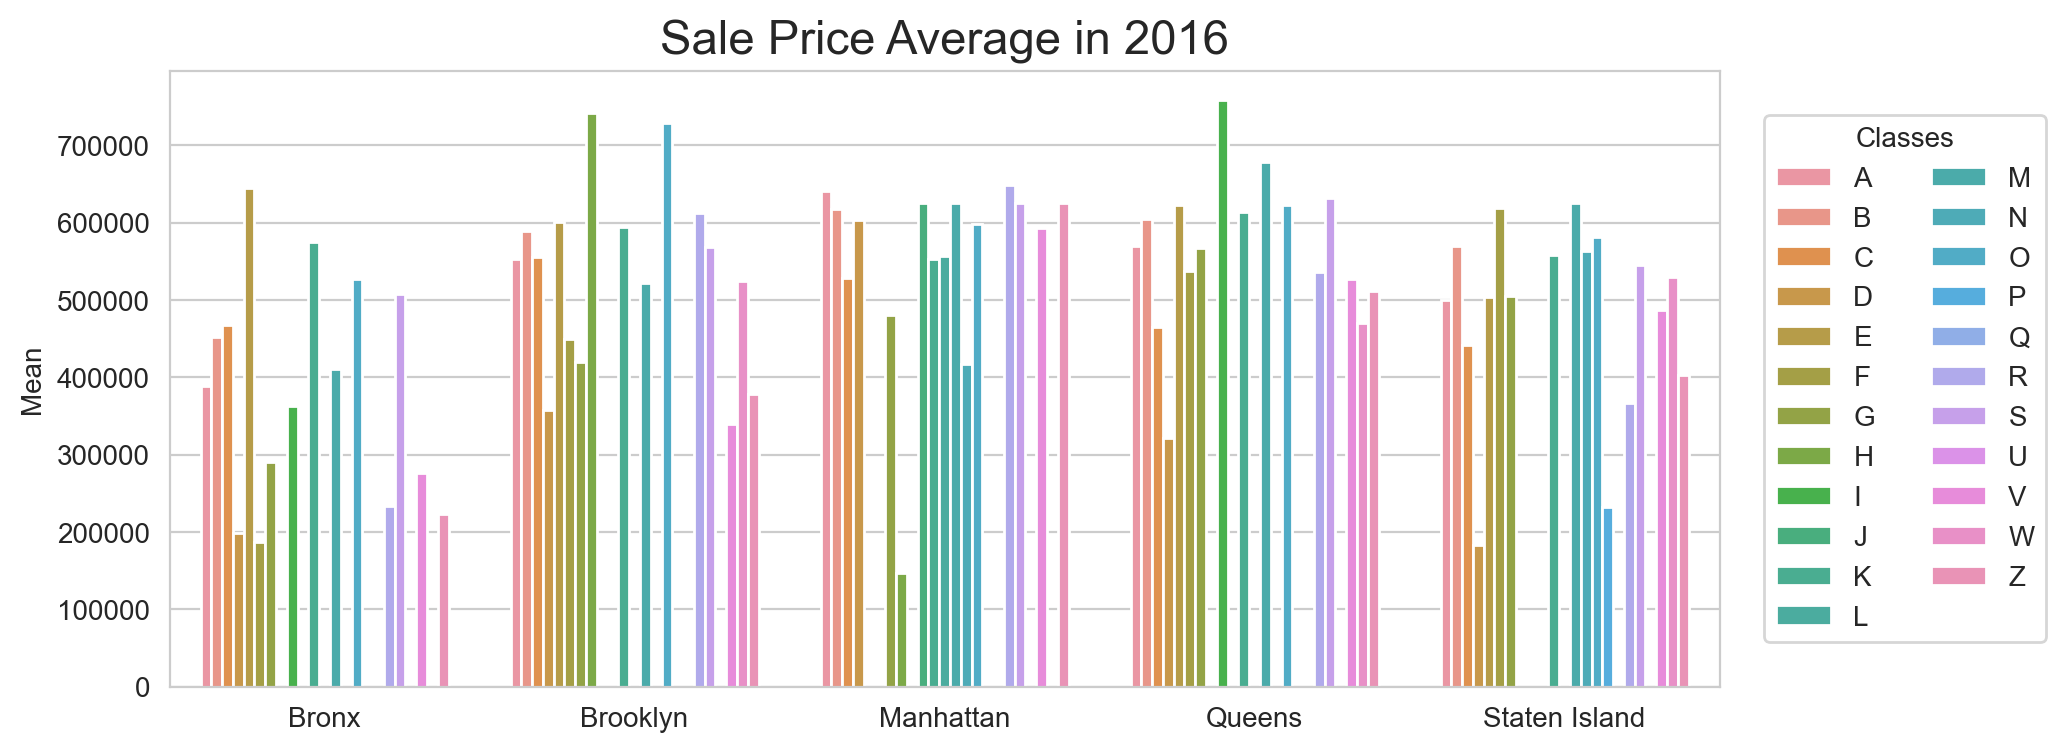

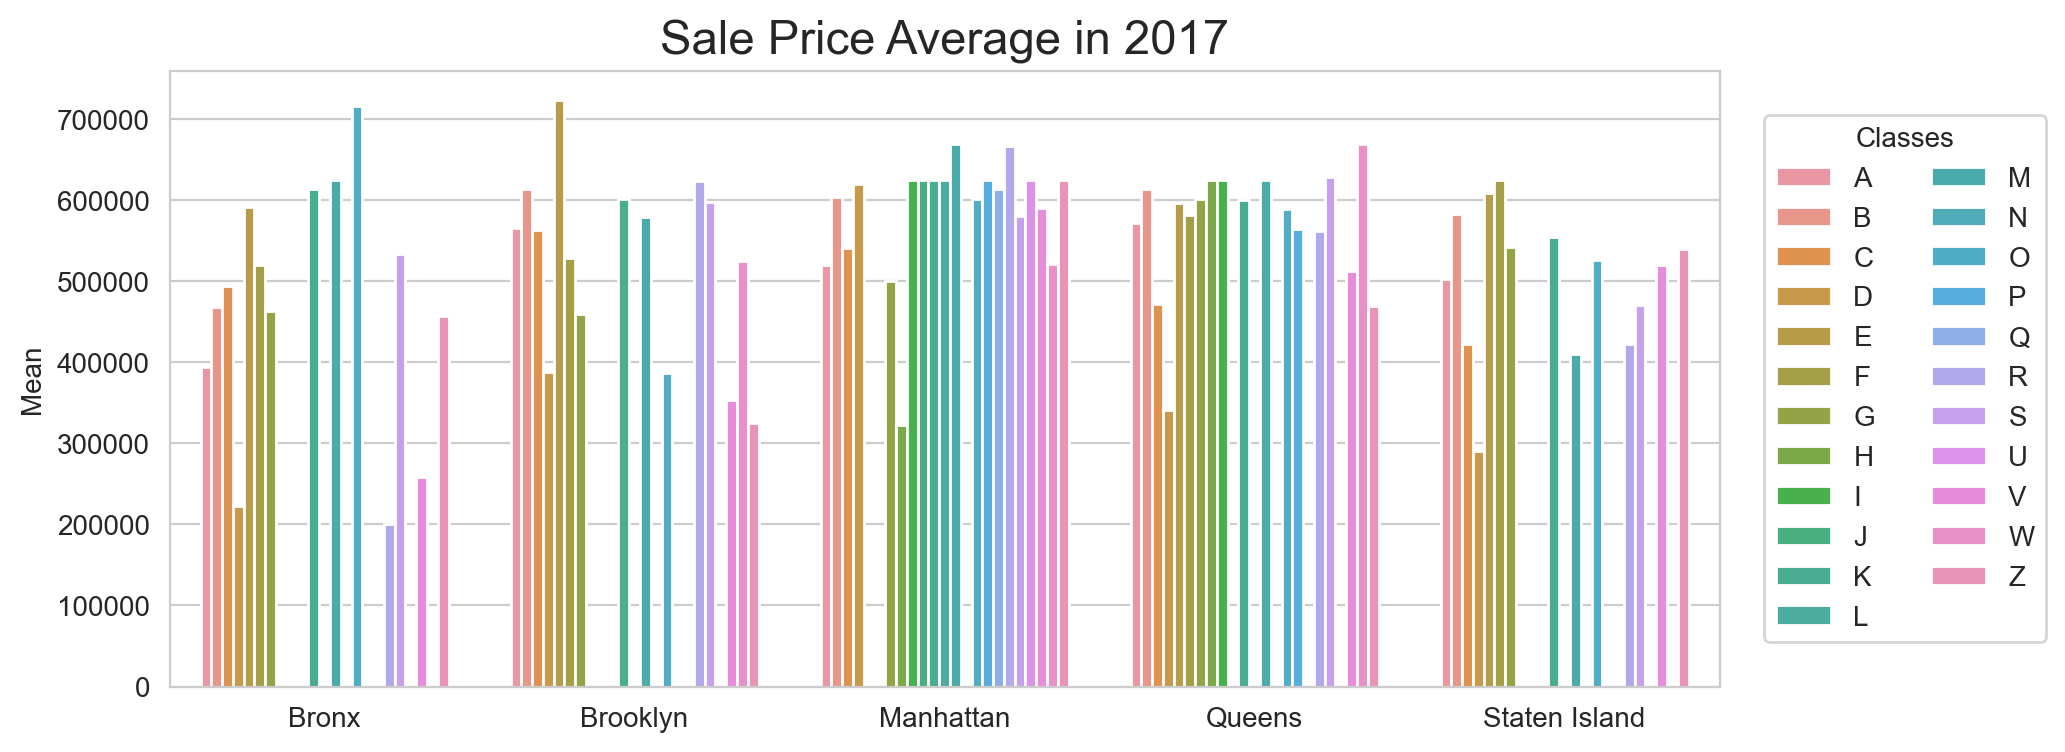

In [27]:
for i in mct["YEAR"].unique():

    with sns.axes_style("whitegrid"):
        plt.figure(figsize=(10,4),dpi=200)
        sns.barplot(data=mct[mct["YEAR"] == i],x="BOROUGH",y="MEAN",hue="BUILDING CLASS AT PRESENT",hue_order=np.sort(mct["BUILDING CLASS AT PRESENT"].unique()))
        plt.title(f"Sale Price Average in {i}", fontsize=17)
        plt.xlabel("")
        plt.ylabel("Mean")
        plt.legend(bbox_to_anchor=(1.02,0.5),loc="center left",title="Classes",ncol=2)
        plt.show()

**Kesimpulan:** Dapat dilihat persebaran SALE PRICE average berdasarkan BUILDING CLASS AT PRESENT dari masing masing tahun, pada tahun 2016 tertinggi ada di Queens dan pada 2017 ada di Brooklyn.

### Median

Melihat nilai tengah GROSS SQUARE FEET di setiap boroughnya.

In [28]:
# Group by 'BOROUGH', lalu tampilkan median dari 'GROSS SQUARE FEET'
median_sale_price = df_without_outliers.groupby(['BOROUGH'])['GROSS SQUARE FEET'].median().reset_index()
print(median_sale_price)

         BOROUGH  GROSS SQUARE FEET
0          Bronx        1584.000000
1       Brooklyn         680.000000
2      Manhattan        4047.591569
3         Queens        2332.000000
4  Staten Island        1794.000000


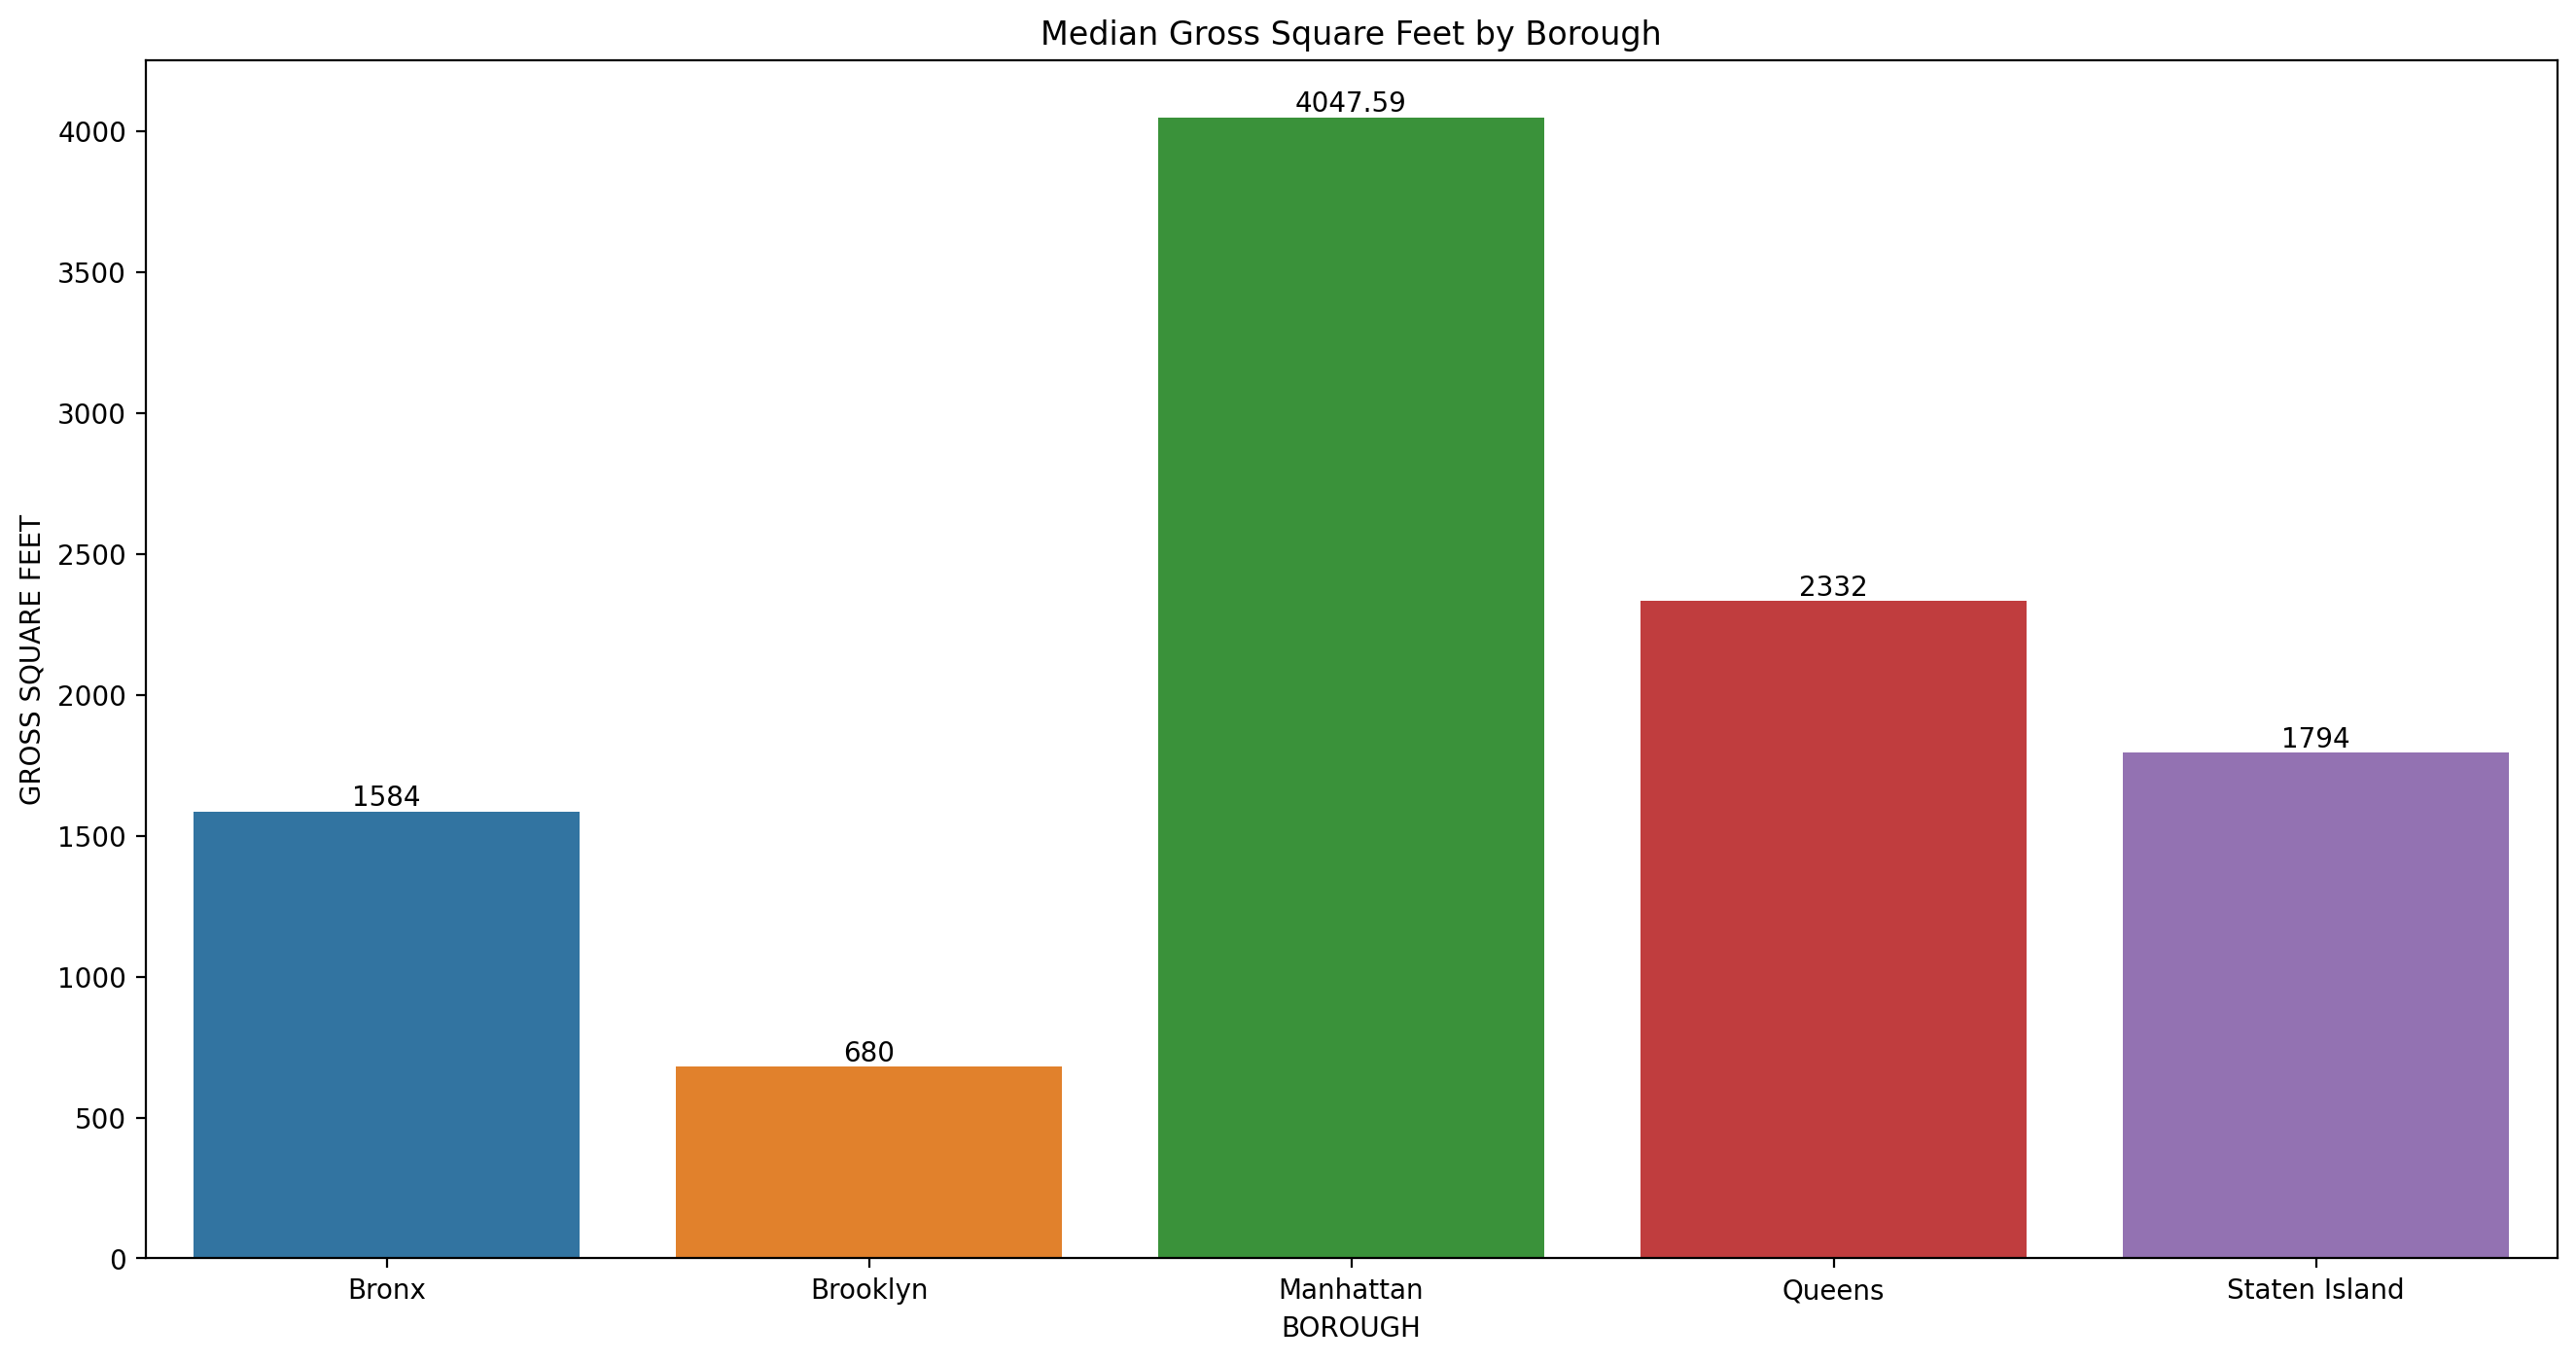

In [29]:
# Visualisasinya dengan barplot
plt.figure(figsize=(16,8),dpi=200)
ax = sns.barplot(data=median_sale_price,x='BOROUGH', y='GROSS SQUARE FEET')

for i in ax.containers:
    ax.bar_label(i,)

plt.title('Median Gross Square Feet by Borough')
plt.show()

**Kesimpulan:** Data luas bangunan (GROSS SQUARE FEET) dikelompokkan berdasarkan borough dan kemudian dihitung median luas bangunan untuk setiap borough. Hasilnya adalah data tabel yang menampilkan borough bersama dengan median luas bangunan masing-masing. Berdasarkan grafik di atas, dapat disimpulkan bahwa borough dengan nilai tengah luas bangunan tertinggi adalah Manhattan dengan jumlah 4047.59.

### Modus

Mencari tahu jenis kategori building mana yg paling banyak diminati.

In [30]:
mode_building_class = df_without_outliers['BUILDING CLASS CATEGORY'].mode().iloc[0]

# Menghitung frequency dari masing masing BUILDING CLASS CATEGORY 
building_class_counts_df = df_without_outliers['BUILDING CLASS CATEGORY'].value_counts().sort_values().reset_index()
building_class_counts_df.columns = ['BUILDING CLASS CATEGORY', 'Counts']
print(building_class_counts_df)

                         BUILDING CLASS CATEGORY  Counts
0    39 TRANSPORTATION FACILITIES                      1
1    40 SELECTED GOVERNMENTAL FACILITIES               1
2    18 TAX CLASS 3 - UNTILITY PROPERTIES              2
3    11 SPECIAL CONDO BILLING LOTS                     2
4    25 LUXURY HOTELS                                  4
5    34 THEATRES                                       7
6    38 ASYLUMS AND HOMES                              8
7    36 OUTDOOR RECREATIONAL FACILITIES               10
8    42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC        11
9    35 INDOOR PUBLIC AND CULTURAL FACILITIES         13
10   49 CONDO WAREHOUSES/FACTORY/INDUS                13
11   28 COMMERCIAL CONDOS                             14
12  11A CONDO-RENTALS                                 18
13   32 HOSPITAL AND HEALTH FACILITIES                21
14   23 LOFT BUILDINGS                                22
15   48 CONDO TERRACES/GARDENS/CABANAS                25
16   16 CONDOS - 2-10 UNIT WITH

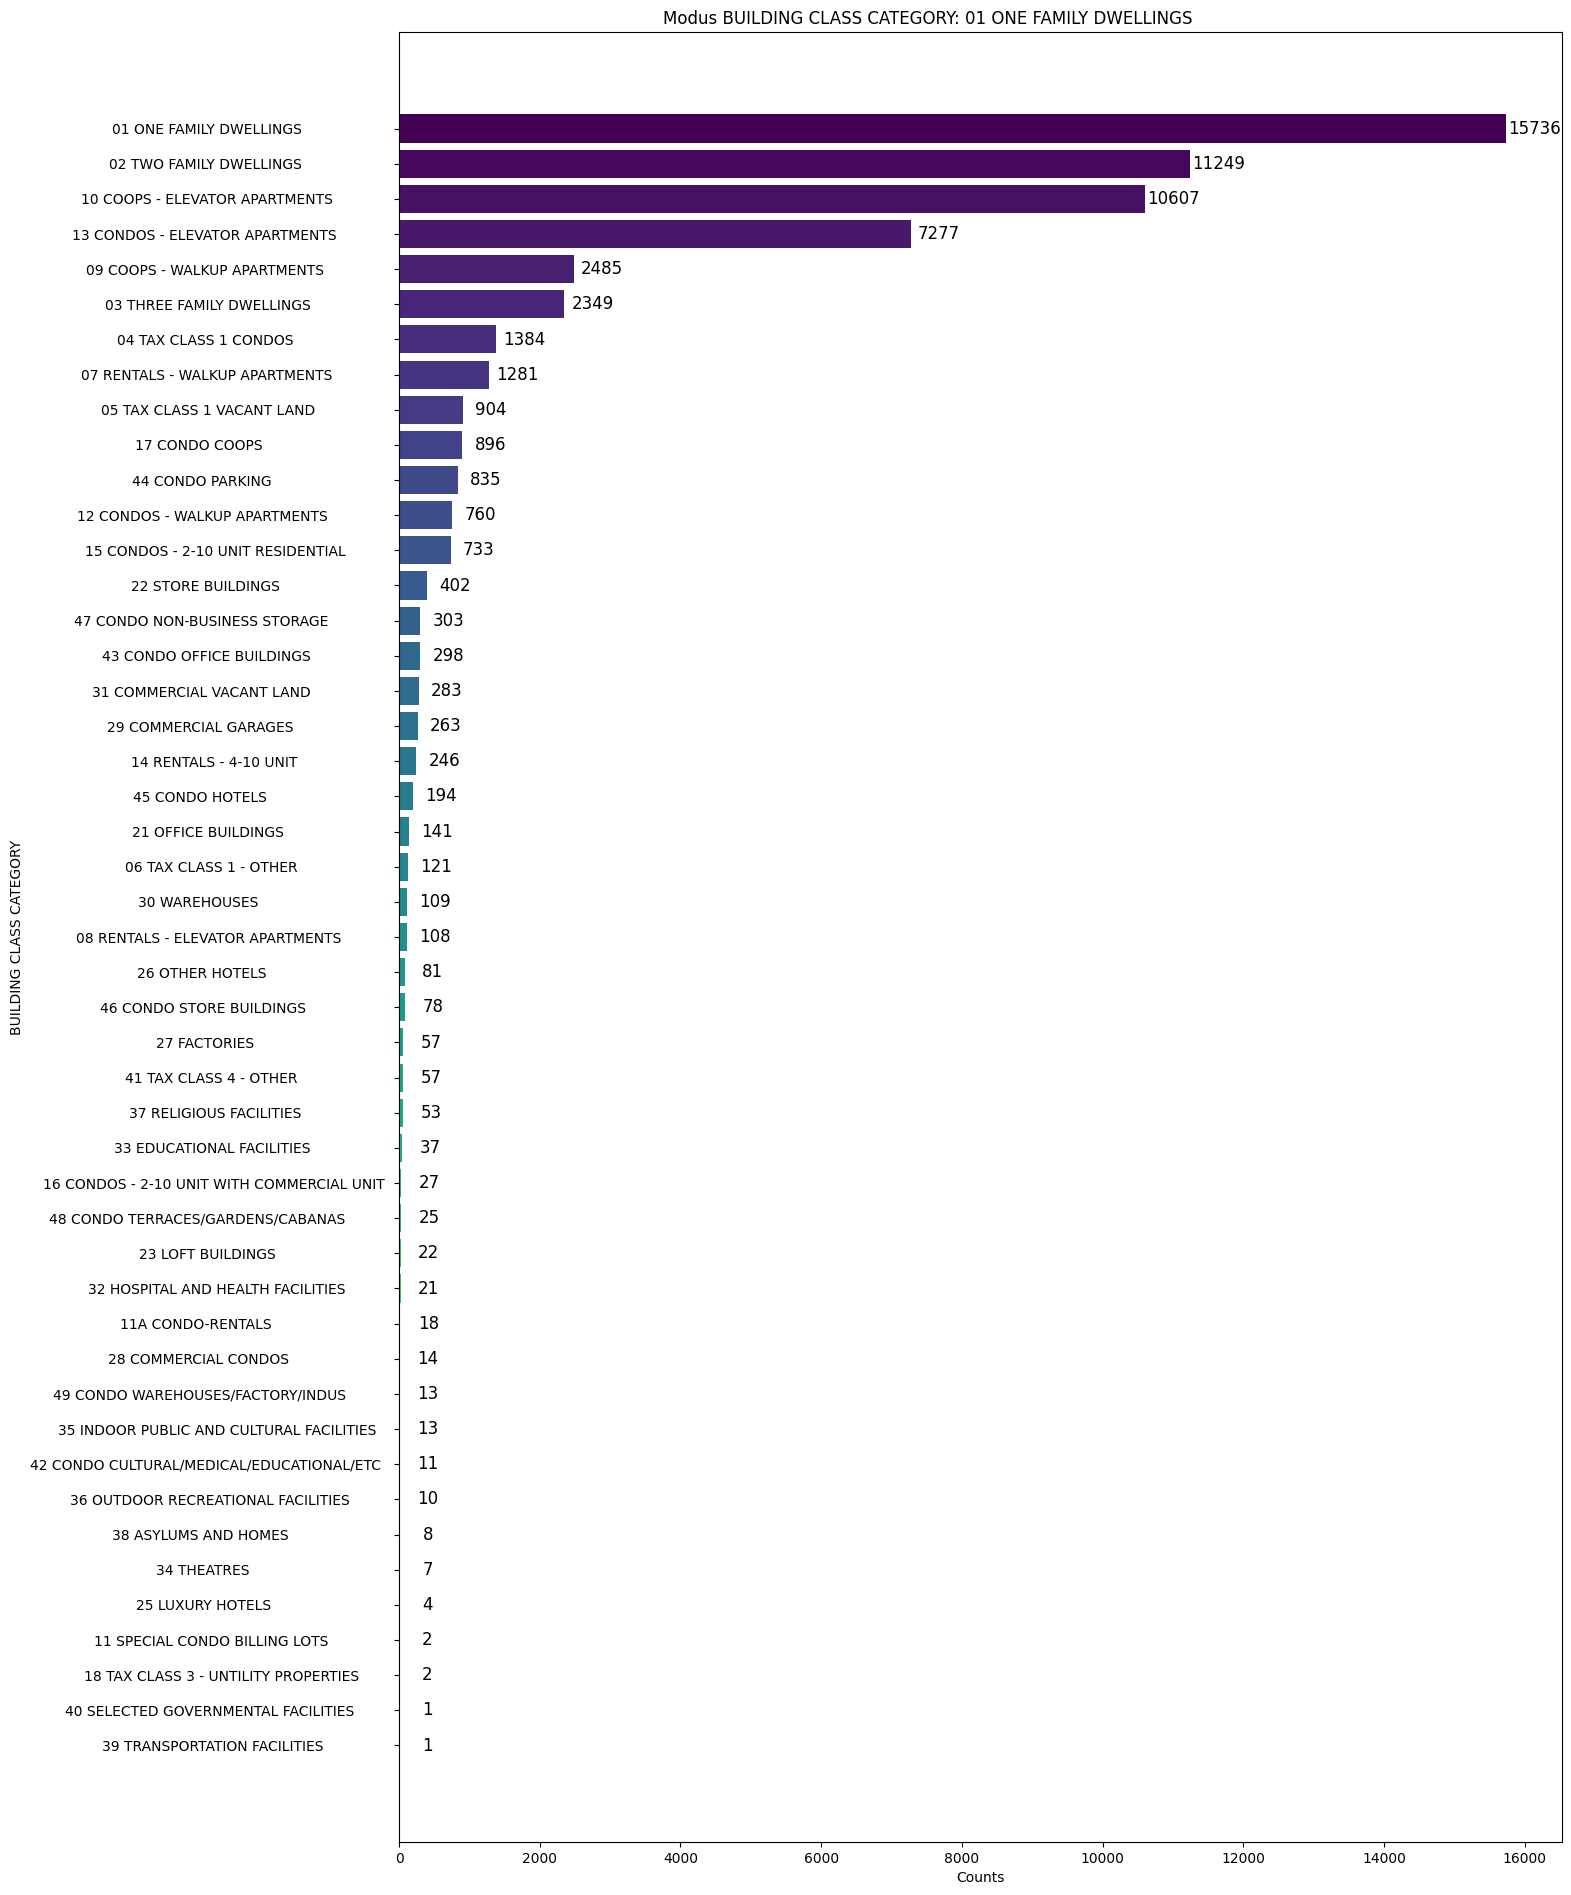

In [31]:
# Horizontal bar plot
colors = plt.cm.viridis(np.linspace(1, 0, len(building_class_counts_df)))
bars = plt.barh(building_class_counts_df['BUILDING CLASS CATEGORY'], building_class_counts_df['Counts'], color=colors)

# Value di samping/akhir bar
for bar, value in zip(bars, building_class_counts_df['Counts']):
    plt.text(bar.get_width() + 400, bar.get_y() + bar.get_height()/2, f'{value}', ha='center', va='center', fontsize=12)

# Menambahkan title dan labels
plt.title(f"Modus BUILDING CLASS CATEGORY: {mode_building_class}")
plt.xlabel('Counts')
plt.ylabel('BUILDING CLASS CATEGORY')

# Set width dan height graph
plt.gcf().set_size_inches(15, len(building_class_counts_df) * 0.5)
plt.show()

**Kesimpulan:** Dihitung modus dari kategori jenis bangunan ('BUILDING CLASS CATEGORY') dalam data penjualan real estat hasilnya adalah jenis bangunan yang paling sering muncul. Selanjutnya, dihitung frekuensi munculnya setiap jenis bangunan dan menyajikannya dalam bentuk data tabel dan grafik batang horizontal yang memvisualisasikan sebaran frekuensi munculnya setiap jenis bangunan. Berdasarkan grafik di atas, dapat disimpulkan bahwa kategori jenis bangunan yang sering diminati adalah 01 ONE FAMILY DWELLINGS.

## Measure of Spread

### Range

Mengetahui range untuk sale price di setiap boroughnya.

In [32]:
# Range untuk Sale Price
min_max_saleprice = df_without_outliers.groupby(['BOROUGH'], observed=False)['SALE PRICE'].agg(['min', 'max', lambda x: x.max() - x.min()]).reset_index()
min_max_saleprice.columns = ['BOROUGH', 'Minimum', 'Maximum', 'Range']
print(min_max_saleprice)

# Overall Range
min_saleprice = df_without_outliers['SALE PRICE'].min()
max_saleprice = df_without_outliers['SALE PRICE'].max()
print("Overall Range for SALE PRICE:", min_saleprice, "-", max_saleprice)

         BOROUGH  Minimum    Maximum      Range
0          Bronx      1.0  1081762.0  1081761.0
1       Brooklyn      1.0  1080000.0  1079999.0
2      Manhattan      1.0  1082500.0  1082499.0
3         Queens      1.0  1082399.0  1082398.0
4  Staten Island      1.0  1075000.0  1074999.0
Overall Range for SALE PRICE: 1.0 - 1082500.0


### Variance

Mengetahui perbedaan varians untuk land square feet dan gross square feet.

In [33]:
# Menghitung variance
var_land = df_without_outliers['LAND SQUARE FEET'].var()
var_gross = df_without_outliers['GROSS SQUARE FEET'].var()

# Menampilkan variance
print("Variance for LAND SQUARE FEET:", var_land)
print("Variance Deviation for GROSS SQUARE FEET:", var_gross)
print("Difference for LAND and GROSS SQUARE FEET:", var_land - var_gross)

Variance for LAND SQUARE FEET: 908177684.2548801
Variance Deviation for GROSS SQUARE FEET: 777176632.3827051
Difference for LAND and GROSS SQUARE FEET: 131001051.87217498


**Kesimpulan:** Varians adalah ukuran seberapa jauh data dalam setiap jenis unit tersebut menyebar dari nilai rata-rata (mean). Varians yang lebih besar menunjukkan bahwa data memiliki variasi yang lebih besar, atau data lebih tersebar dari nilai rata-rata. Berdasarkan hasil di atas, dapat disimpulkan bahwa LAND SQUARE FEET (908177684.2548801) memiliki varians yang lebih tinggi dibandingkan dengan GROSS SQUARE FEET (777176632.3827051) dengan selisih 131001051.87217498.

### Standard Deviation

Mengetahui perbedaan standar deviasi untuk residential units, commercial units dan total units.

In [34]:
# Menghitung StdDev
stddev_residential = df_without_outliers['RESIDENTIAL UNITS'].std()
stddev_commercial = df_without_outliers['COMMERCIAL UNITS'].std()
stddev_total = df_without_outliers['TOTAL UNITS'].std()

# Menampilkan StdDev
print("Standard Deviation for RESIDENTIAL UNITS:", stddev_residential)
print("Standard Deviation for COMMERCIAL UNITS:", stddev_commercial)
print("Difference for RESIDENTIAL and COMMERCIAL UNITS:", stddev_residential - stddev_commercial)
print("Standard Deviation for TOTAL UNITS:", stddev_total)

Standard Deviation for RESIDENTIAL UNITS: 15.241271355224589
Standard Deviation for COMMERCIAL UNITS: 9.807689538148459
Difference for RESIDENTIAL and COMMERCIAL UNITS: 5.43358181707613
Standard Deviation for TOTAL UNITS: 18.229323405850284


**Kesimpulan:** Standar deviasi yang lebih besar menunjukkan bahwa data memiliki variasi yang lebih besar, atau data lebih tersebar dari nilai rata-rata. Standar deviasi residential units, commercial units dan total units bisa dilihat pada hasil di atas.

## Confidence Interval of Sample Mean

Urutkan 10 BOROUGH teratas berdasarkan SALE PRICE mean dari kategori BUILDING CLASS AT PRESENT di tahun 2017.

In [35]:
top_10 = mct[mct["YEAR"] == 2017].sort_values("MEAN",ascending=False).head(10)
top_10

,BOROUGH,BUILDING CLASS AT PRESENT,YEAR,MEAN,MEDIAN,MODE,RANGE,VARIANCE,STANDARD DEVIATION
59,Brooklyn,E,2017,723714.285714,980000.0,1000000.0,1049000.0,1.568816e+11,396082.783555
29,Bronx,O,2017,716351.200000,750000.0,450000.0,560000.0,6.992729e+10,264437.683977
125,Manhattan,M,2017,669738.000000,625500.0,625500.0,670000.0,4.199603e+10,204929.331335
195,Queens,W,2017,669187.500000,625500.0,625500.0,349500.0,1.526878e+10,123566.910012
135,Manhattan,R,2017,666741.849139,625500.0,625500.0,1082499.0,3.696763e+10,192269.690603
187,Queens,S,2017,628088.172840,625500.0,625500.0,1079990.0,3.582740e+10,189281.279739
167,Queens,I,2017,625500.000000,625500.0,625500.0,0.0,0.000000e+00,0.000000
117,Manhattan,I,2017,625500.000000,625500.0,625500.0,0.0,0.000000e+00,0.000000
119,Manhattan,J,2017,625500.000000,625500.0,625500.0,0.0,0.000000e+00,0.000000
121,Manhattan,K,2017,625500.000000,625500.0,625500.0,0.0,0.000000e+00,0.000000


Slice dataset berdasarkan BOROUGH, BUILDING CLASS AT PRESENT, dan YEAR yang memiliki top 10 average tertinggi di SALE PRICE. Lalu SALE PRICE sebagai array.

In [36]:
temp = []
for i,j,k in zip(top_10["BOROUGH"],top_10["BUILDING CLASS AT PRESENT"],top_10["YEAR"]):
    temp.append(df_without_outliers[(df_without_outliers["BOROUGH"] == i) & 
                                 (df_without_outliers["BUILDING CLASS AT PRESENT"] == j) &
                                 (df_without_outliers["YEAR"] == k)])
    
top_10_sale_price = np.array(pd.concat(temp)["SALE PRICE"])
top_10_sale_price

array([5.850e+05, 1.000e+03, 1.050e+06, ..., 6.255e+05, 6.255e+05,
       6.255e+05])

Ambil 30 random sample dan hitung meannya sebanyak 500 kali. Kemudian tambahkan valuesnya ke dalam list sample_means.

In [37]:
np.random.seed(807)
sample_means = []
n = 30 
for sample in range(0,500):
    sample_values = np.random.choice(a = top_10_sale_price, size = n)
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

Visualisasikan, dan kita dapat menyimpulkan bahwa data kita terdistribusi normal secara visual.

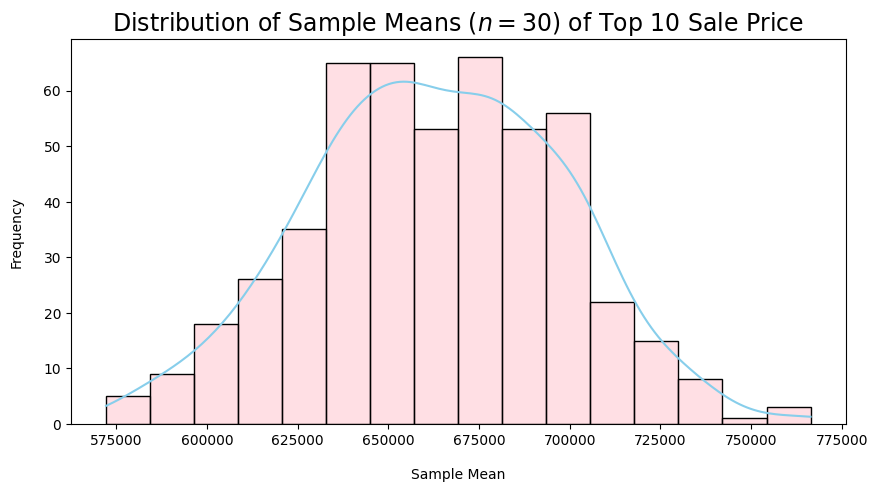

In [38]:
plt.figure(figsize=(10,5),dpi=100)
ax = sns.histplot(data=sample_means,kde=True,color="pink")
ax.lines[0].set_color("skyblue")
plt.title("Distribution of Sample Means ($n=30$) of Top 10 Sale Price", fontsize=17)
plt.xlabel("Sample Mean", labelpad=14)
plt.ylabel("Frequency", labelpad=14)
plt.show()

Menghitung nilai z-score.

In [39]:
conf = 0.95
z = NormalDist().inv_cdf((1 + conf) / 2)
z 

1.9599639845400536

Menghitung mean dari sample_means.

In [40]:
mean_of_sample_means = np.mean(sample_means)
mean_of_sample_means

663149.8946666666

Menghitung standar deviasi dari sample_means.

In [41]:
std_of_sample_means = np.std(sample_means)
std_of_sample_means

34935.555081173145

Menghitung standar deviasi dari top_10_sale_price.

In [42]:
pop_std_dev = top_10_sale_price.std()
pop_std_dev

191614.40129604287

Menghitung standard error dari top_10_sale_price.

In [43]:
se_pop = pop_std_dev/np.sqrt(n)
se_pop

34983.843310896606

Menghitung batas bawah dari top_10_sale_price.

In [44]:
lower = mean_of_sample_means - z*se_pop
lower

594582.8217365168

Menghitung batas atas dari top_10_sale_price.

In [45]:
upper = mean_of_sample_means + z*se_pop
upper

731716.9675968165

Visualisasi confidence interval dari sample_means.

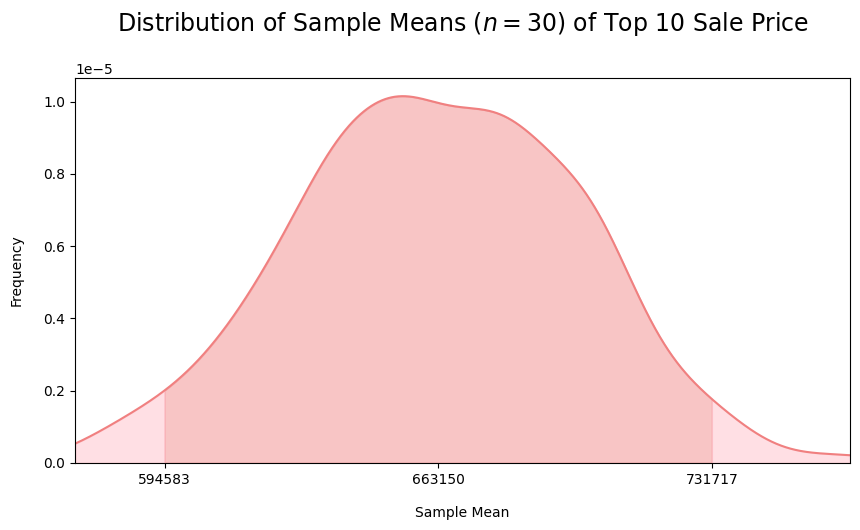

In [46]:
plt.figure(figsize=(10,5),dpi=100)
kde = gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means), 10000)
plt.plot(pos, kde(pos), color="lightcoral")
shade = np.linspace(lower, upper, 300)

plt.fill_between(shade, kde(shade), alpha=0.45, color='lightcoral')
plt.xticks([lower,mean_of_sample_means,upper])
plt.xlim(xmin=np.min(sample_means),xmax=np.max(sample_means))
plt.ylim(ymin=0)

left = np.linspace(np.min(sample_means),lower,10000)
right = np.linspace(upper,np.max(sample_means),10000)
for i in [left,right]:
    plt.fill_between(i,kde(i),color="pink",alpha=0.5)
    
plt.title("Distribution of Sample Means ($n=30$) of Top 10 Sale Price", y=1.1, fontsize=17)
plt.xlabel("Sample Mean", labelpad=14)
plt.ylabel("Frequency", labelpad=14)
plt.show()

**Kesimpulan:**  Berdasarkan grafik, dapat disimpulkan bahwa terdapat peluang sebesar 95% bahwa rata-rata dari sampel dengan N = 30 akan berada dalam area berwarna pink tua. Dengan demikian, probabilitas bahwa rata-rata dari sampel dengan N = 30 akan berada di luar area berwarna pink adalah 100% - 95% atau sebesar 5%.

## Probability Distribution and Hypothesis Testing

### Uji Normalitas secara Formal dan Visual

### Hypothesis
- $H_{0}$: data top_5_sale_price berdistribusi normal
- $H_{1}$: data top_5_sale_price tidak berdistribusi normal

### Significance Level
$\alpha = 5\%$

### Test Statistics
Slice dataset berdasarkan BOROUGH, BUILDING CLASS AT PRESENT, dan YEAR yang memiliki top 5 average tertinggi di SALE PRICE. Lalu SALE PRICE sebagai array.

In [47]:
top_5 = mct[mct["YEAR"] == 2017].sort_values("MEAN",ascending=False).head(5)
top_5

,BOROUGH,BUILDING CLASS AT PRESENT,YEAR,MEAN,MEDIAN,MODE,RANGE,VARIANCE,STANDARD DEVIATION
59,Brooklyn,E,2017,723714.285714,980000.0,1000000.0,1049000.0,1.568816e+11,396082.783555
29,Bronx,O,2017,716351.200000,750000.0,450000.0,560000.0,6.992729e+10,264437.683977
125,Manhattan,M,2017,669738.000000,625500.0,625500.0,670000.0,4.199603e+10,204929.331335
195,Queens,W,2017,669187.500000,625500.0,625500.0,349500.0,1.526878e+10,123566.910012
135,Manhattan,R,2017,666741.849139,625500.0,625500.0,1082499.0,3.696763e+10,192269.690603


In [48]:
top_5_sale_price = np.array(df_without_outliers[(df_without_outliers["BOROUGH"]==top_5["BOROUGH"].iloc[0]) & 
                               (df_without_outliers["BUILDING CLASS AT PRESENT"]==top_5["BUILDING CLASS AT PRESENT"].iloc[0]) &
                               (df_without_outliers["YEAR"]==top_5["YEAR"].iloc[0])]["SALE PRICE"])
top_5_sale_price

array([5.85e+05, 1.00e+03, 1.05e+06, 9.80e+05, 4.50e+05, 1.00e+06,
       1.00e+06])

Visualisasikan dengan histogram untuk mengecek normalitas secara visual. Uji normalitas secara formal akan dilakukan dengan Kolmorogov-Smirnov dengan Lilliefors significance correction dan Shapiro-Wilk tests.

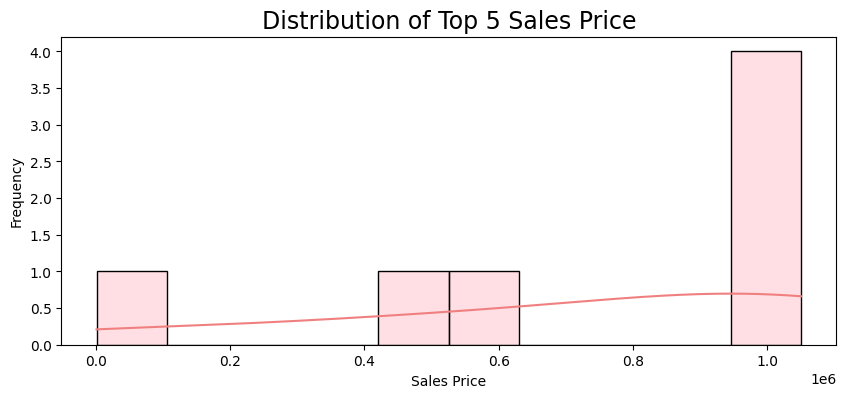

,Kolmogorov-Smirnov,Prob. (K-S),Reject H0 (K-S),Shapiro-Wilk,Prob. (S-W),Reject H0 (S-W)
,0.312629,0.037331,Reject,0.820586,0.065056,Fail to Reject


In [49]:
plt.figure(figsize=(10,4), dpi=100)
ax = sns.histplot(data=top_5_sale_price,bins=10,kde=True, color="pink")
ax.lines[0].set_color("lightcoral")
plt.xlabel("Sales Price")
plt.ylabel("Frequency")
plt.title("Distribution of Top 5 Sales Price", fontsize=17)

plt.show()

ks_stat,ks_pval = lilliefors(top_5_sale_price,dist="norm",pvalmethod="approx")
sw_stat,sw_pval = shapiro(top_5_sale_price)
ks_reject = "Reject" if ks_pval < 0.05 else "Fail to Reject"
sw_reject = "Reject" if sw_pval < 0.05 else "Fail to Reject"

pd.DataFrame({
    "Kolmogorov-Smirnov": [ks_stat],
    "Prob. (K-S)": [ks_pval],
    "Reject H0 (K-S)": [ks_reject],
    "Shapiro-Wilk": [sw_stat],
    "Prob. (S-W)": [sw_pval],
    "Reject H0 (S-W)": [sw_reject]
}, index=[""])

**Kesimpulan:** Berdasarkan output diatas, probability Kolmogorov-Smirnov = 0,037331 < α = 0,05. Sedangkan probability Shapiro-Wilk = 0,065056 > α = 0,05 sehingga dapat disimpulkan bahwa data tidak berdistribusi normal. Oleh karena itu asumsi normalitas secara visual dan formal belum terpenuhi sehingga perlu ditindaklanjuti dengan melakukan transformasi.

Power transformation adalah metode statistik yang melibatkan peningkatan nilai suatu variabel ke eksponen tertentu. Transformasi ini digunakan untuk mengubah distribusi data agar mendekati distribusi normal atau untuk mengurangi variabilitas antar nilai. Bentuk umum transformasi pangkat adalah $Y=X^p$, dengan $X$ adalah nilai asli variabel, $Y$ adalah nilai transformasi, dan $p$ adalah eksponen.

Berikut akan digunakan fungsi NumPy np.power untuk melakukan transformasi. Jenis transformasi ini melibatkan peningkatan setiap titik data individual dalam array ke pangkat yang ditentukan oleh custom_exponent. Dalam hal ini, custom_exponent diatur ke 5 berarti setiap titik data akan dipangkatkan lima.

In [50]:
# Exponent bisa diadjust sesuai kebutuhan
custom_exponent = 5 
transform = np.power(top_5_sale_price, custom_exponent)

Kemudian ulangi dengan langkah yang sama, visualisasikan dengan histogram untuk memeriksa kembali normalitas secara visual serta secara formal menggunakan Kolmorogov-Smirnov dengan Lilliefors significance correction dan Shapiro-Wilk tests.

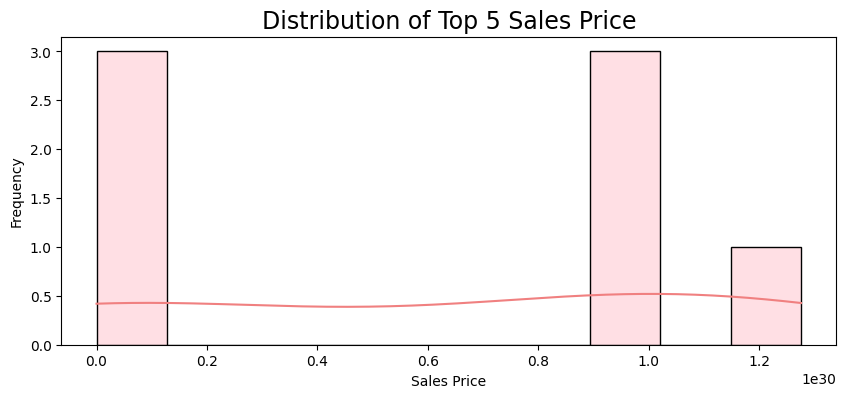

,Kolmogorov-Smirnov,Prob. (K-S),Reject H0 (K-S),Shapiro-Wilk,Prob. (S-W),Reject H0 (S-W)
,0.273402,0.127371,Fail to Reject,0.810126,0.051514,Fail to Reject


In [51]:
plt.figure(figsize=(10,4), dpi=100)
ax = sns.histplot(data=transform,bins=10,kde=True, color="pink")
ax.lines[0].set_color("lightcoral")
plt.xlabel("Sales Price")
plt.ylabel("Frequency")
plt.title("Distribution of Top 5 Sales Price", fontsize=17)

plt.show()

ks_stat,ks_pval = lilliefors(transform,dist="norm",pvalmethod="approx")
sw_stat,sw_pval = shapiro(transform)
ks_reject = "Reject" if ks_pval < 0.05 else "Fail to Reject"
sw_reject = "Reject" if sw_pval < 0.05 else "Fail to Reject"

pd.DataFrame({
    "Kolmogorov-Smirnov": [ks_stat],
    "Prob. (K-S)": [ks_pval],
    "Reject H0 (K-S)": [ks_reject],
    "Shapiro-Wilk": [sw_stat],
    "Prob. (S-W)": [sw_pval],
    "Reject H0 (S-W)": [sw_reject]
}, index=[""])

**Kesimpulan:** Berdasarkan output diatas terlihat secara visual sebarannya mendekati simetris sehingga terlihat berdistribusi normal. Uji normalitas secara formal didapatkan probability Kolmogorov-Smirnov = 0,127371 > α = 0,05 dan probabilitas Shapiro-Wilk = 0,051514 > α = 0,05. Sehingga dapat disimpulkan bahwa data tersebut berdistribusi normal. Oleh karena itu asumsi normalitas secara visual dan formal terpenuhi.